In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('colorblind')

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [2]:
df = pd.read_csv('../data/total_df.csv')

In [3]:
df.columns.tolist()

['zip_code',
 'Monthly_Avg_Zip',
 'FL_Unemployment',
 'year',
 'Encoded_Zip',
 'total_pop',
 'households',
 'male_pop',
 'female_pop',
 'median_age',
 'male_under_5',
 'male_5_to_9',
 'male_10_to_14',
 'male_15_to_17',
 'male_18_to_19',
 'male_20',
 'male_21',
 'male_22_to_24',
 'male_25_to_29',
 'male_30_to_34',
 'male_35_to_39',
 'male_40_to_44',
 'male_45_to_49',
 'male_50_to_54',
 'male_55_to_59',
 'male_65_to_66',
 'male_67_to_69',
 'male_70_to_74',
 'male_75_to_79',
 'male_80_to_84',
 'male_85_and_over',
 'female_under_5',
 'female_5_to_9',
 'female_10_to_14',
 'female_15_to_17',
 'female_18_to_19',
 'female_20',
 'female_21',
 'female_22_to_24',
 'female_25_to_29',
 'female_30_to_34',
 'female_35_to_39',
 'female_40_to_44',
 'female_45_to_49',
 'female_50_to_54',
 'female_55_to_59',
 'female_60_to_61',
 'female_62_to_64',
 'female_65_to_66',
 'female_67_to_69',
 'female_70_to_74',
 'female_75_to_79',
 'female_80_to_84',
 'female_85_and_over',
 'population_1_year_and_over',
 'pop

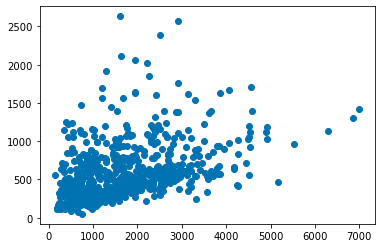

In [4]:
plt.scatter(df.unemployed_pop, df.vacant_housing_units_for_rent)

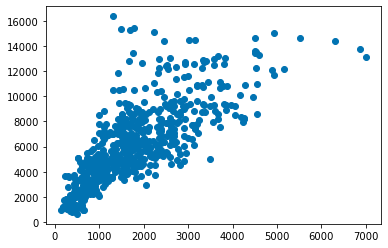

In [5]:
plt.scatter(df.unemployed_pop, df.high_school_diploma)

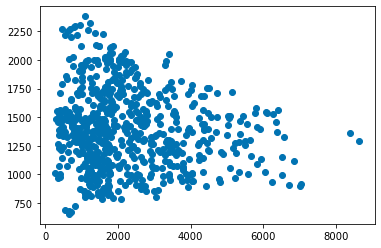

In [7]:
plt.scatter(df.in_undergrad_college, df.Monthly_Avg_Zip)

In [8]:
df.head()

,zip_code,Monthly_Avg_Zip,FL_Unemployment,year,Encoded_Zip,total_pop,households,male_pop,female_pop,median_age,...,occupation_sales_office,occupation_services,management_business_sci_arts_employed,sales_office_employed,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_school,in_undergrad_college,FLSTHPI_Yearly_Avg
0,33160,1866.833333,7.533333,2013,73,37674,19247,18472,19202,49.6,...,4713.0,2773.0,7911.0,4713.0,935,1346,965,6471,2019,291.655
1,33025,1341.083333,7.533333,2013,41,57766,21206,27852,29914,32.9,...,8948.0,5448.0,10806.0,8948.0,2963,3682,3345,18163,4987,291.655
2,33139,1842.666667,7.533333,2013,61,38066,20883,22090,15976,38.1,...,4865.0,7164.0,9995.0,4865.0,685,649,379,5387,1906,291.655
3,32256,947.750000,7.533333,2013,10,40024,18039,18865,21159,32.7,...,6247.0,2597.0,11070.0,6247.0,1638,1598,1629,10962,3429,291.655
4,33009,1443.416667,7.533333,2013,36,39889,19125,19256,20633,47.1,...,4958.0,3977.0,5087.0,4958.0,1335,1020,1249,6495,1885,291.655


In [12]:
new_df = df.set_index('zip_code').drop(columns = 'Encoded_Zip')
new_df.head()

,Monthly_Avg_Zip,FL_Unemployment,year,total_pop,households,male_pop,female_pop,median_age,male_under_5,male_5_to_9,...,occupation_sales_office,occupation_services,management_business_sci_arts_employed,sales_office_employed,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_school,in_undergrad_college,FLSTHPI_Yearly_Avg
zip_code,,,,,,,,,,,,,,,,,,,,,
33160,1866.833333,7.533333,2013,37674,19247,18472,19202,49.6,626,654,...,4713.0,2773.0,7911.0,4713.0,935,1346,965,6471,2019,291.655
33025,1341.083333,7.533333,2013,57766,21206,27852,29914,32.9,2143,2102,...,8948.0,5448.0,10806.0,8948.0,2963,3682,3345,18163,4987,291.655
33139,1842.666667,7.533333,2013,38066,20883,22090,15976,38.1,981,513,...,4865.0,7164.0,9995.0,4865.0,685,649,379,5387,1906,291.655
32256,947.750000,7.533333,2013,40024,18039,18865,21159,32.7,1084,1124,...,6247.0,2597.0,11070.0,6247.0,1638,1598,1629,10962,3429,291.655
33009,1443.416667,7.533333,2013,39889,19125,19256,20633,47.1,1213,830,...,4958.0,3977.0,5087.0,4958.0,1335,1020,1249,6495,1885,291.655


In [15]:
normalized_df=(new_df - new_df.min()) / (new_df.max() - new_df.min())

In [24]:
model = DBSCAN(eps = 0.1, min_samples = 9)
y_hat = model.fit_predict(normalized_df)

In [25]:
clusters = np.unique(y_hat)
clusters

array([-1])

In [18]:
normalized_df.head()

,Monthly_Avg_Zip,FL_Unemployment,year,total_pop,households,male_pop,female_pop,median_age,male_under_5,male_5_to_9,...,occupation_sales_office,occupation_services,management_business_sci_arts_employed,sales_office_employed,in_grades_1_to_4,in_grades_5_to_8,in_grades_9_to_12,in_school,in_undergrad_college,FLSTHPI_Yearly_Avg
zip_code,,,,,,,,,,,,,,,,,,,,,
33160,0.701893,1.0,0.0,0.452251,0.761098,0.459151,0.445670,0.667702,0.208556,0.187378,...,0.353171,0.262449,0.467841,0.353171,0.176738,0.300141,0.176666,0.244112,0.209130,0.0
33025,0.397809,1.0,0.0,0.744698,0.855626,0.738834,0.750291,0.149068,0.749376,0.658426,...,0.729348,0.565188,0.667841,0.729348,0.577212,0.847470,0.641782,0.789422,0.563815,0.0
33139,0.687915,1.0,0.0,0.457957,0.840041,0.567028,0.353931,0.310559,0.335116,0.141509,...,0.366673,0.759393,0.611813,0.366673,0.127370,0.136832,0.062146,0.193554,0.195626,0.0
32256,0.170313,1.0,0.0,0.486456,0.702808,0.470869,0.501322,0.142857,0.371836,0.340273,...,0.489430,0.242531,0.686079,0.489430,0.315561,0.359185,0.306430,0.453570,0.377629,0.0
33009,0.456997,1.0,0.0,0.484491,0.755211,0.482527,0.486364,0.590062,0.417825,0.244632,...,0.374933,0.398710,0.272746,0.374933,0.255727,0.223758,0.232167,0.245231,0.193117,0.0
